In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [2]:
#Loads the data from the scattered spectrum for the angle in question

channel, E, N = np.loadtxt('Archive 3/105_scatt_0519.tsv', unpack=True, skiprows=25)

#Converts counts into rate

R_scatt = N/1008.59

#Computes uncertainty for rate

dR_scatt = np.sqrt(N)/1008.59
for i, value in enumerate(dR_scatt):
    if value == 0:
        dR_scatt[i] = 1.14

In [3]:
#Loads the data from the background spectrum for the angle in question

channel_bkg, E_bkg, N_bkg = np.loadtxt('Archive 3/105_bkg_0519.tsv', unpack=True, skiprows=25)

#Converts counts into rate

R_bkg = N_bkg/1595.57

#Computes uncertainty for rate

dR_bkg = np.sqrt(R_bkg)/1595.57
for i, value in enumerate(dR_bkg):
    if value == 0:
        dR_bkg[i] = 1.14

In [4]:
#Subtracts the background from the scattered spectrum

R_bkg_sub = R_scatt - (R_bkg)

#Computes the uncertainty for the background subtracted spectrum

dR_bkg_sub = np.sqrt(dR_scatt**2+dR_bkg**2)
for i, value in enumerate(dR_bkg_sub):
    if value == 0:
        dR_bkg_sub[i] = 1.14

<IPython.core.display.Javascript object>


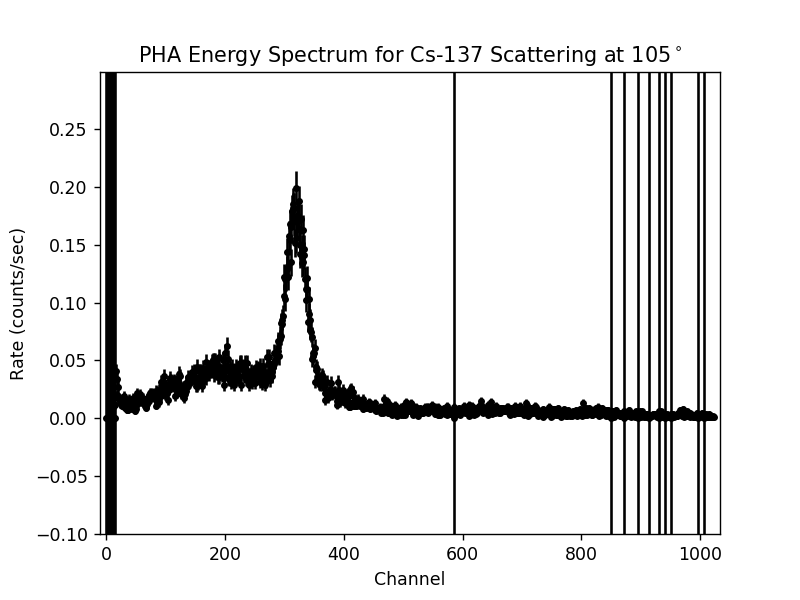

In [5]:
#Plots the scattered spectrum

fig = plt.figure()
ax = fig.add_subplot(111)
ax.errorbar(channel, R_scatt, dR_scatt, fmt='k.')
ax.axis([min(channel)-10,max(channel)+10,min(R_scatt)-.10,max(R_scatt)+.10])
ax.set_title('PHA Energy Spectrum for Cs-137 Scattering at 105$^\\circ$')
ax.set_xlabel('Channel')
ax.set_ylabel('Rate (counts/sec)')

plt.savefig('Exp2_105_scatt_0519.pdf')
plt.show()

<IPython.core.display.Javascript object>


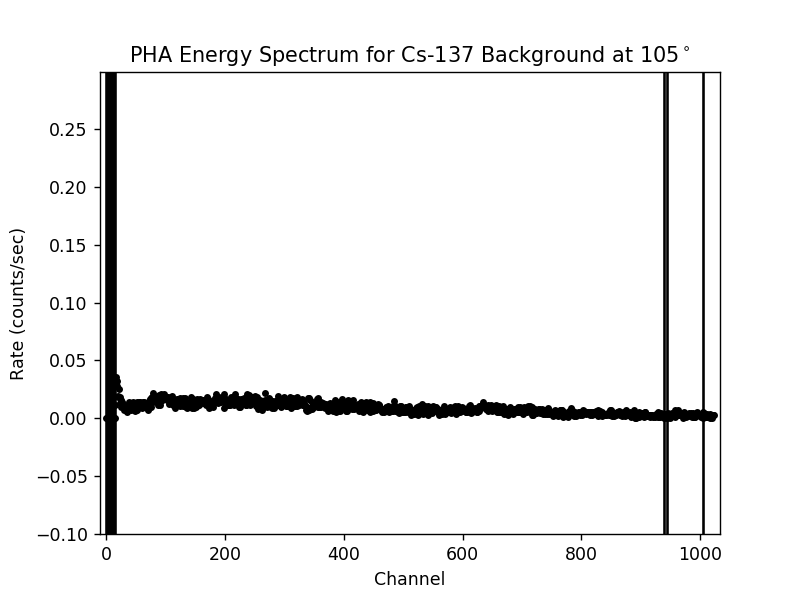

In [6]:
#Plots the background spectrum

fig = plt.figure()
ax = fig.add_subplot(111)
ax.errorbar(channel_bkg, R_bkg, dR_bkg, fmt='k.')
ax.axis([min(channel)-10,max(channel)+10,min(R_bkg)-.10,max(R_scatt)+.10])
ax.set_title('PHA Energy Spectrum for Cs-137 Background at 105$^\\circ$')
ax.set_xlabel('Channel')
ax.set_ylabel('Rate (counts/sec)')

plt.savefig('Exp2_105_scatt_0519_bkg.pdf')
plt.show()

<IPython.core.display.Javascript object>


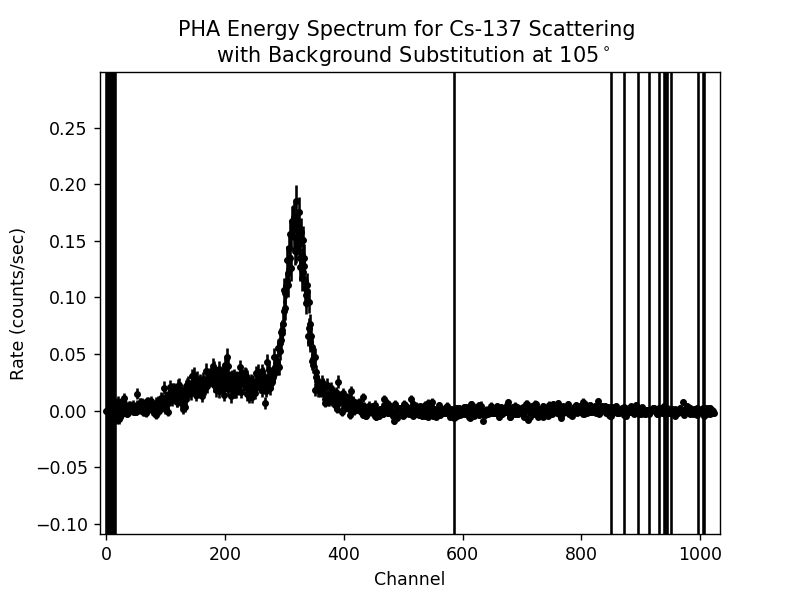

In [7]:
#Plots the background subtracted scattered spectrum

fig = plt.figure()
ax = fig.add_subplot(111)
ax.errorbar(channel, R_bkg_sub, dR_bkg_sub, fmt='k.')
ax.axis([min(channel)-10,max(channel)+10,min(R_bkg_sub)-.10,max(R_scatt)+.10])
ax.set_title('PHA Energy Spectrum for Cs-137 Scattering \n with Background Substitution at 105$^\\circ$')
ax.set_xlabel('Channel')
ax.set_ylabel('Rate (counts/sec)')

plt.savefig('Exp2_105_scatt_0519_bkg_sub.pdf')
plt.show()

Converged with chi-squared 104.46052008730273
Number of degrees of freedom, dof = 95
Reduced chi-squared  1.0995844219716076
Inital guess values:
  p0 = [50.0, 320.0, 30.0, 100.0, 0.1]
Best fit values:
  pf = [ 6.00026718e+00  3.19669172e+02  1.64436380e+01  5.21569004e-02
 -1.09295066e-04]
Uncertainties in the best fit values:
  pferr = [0.23695947664154288, 0.3981354590324377, 0.482538330373962, 0.016252736508836678, 4.371641376630636e-05]


<IPython.core.display.Javascript object>


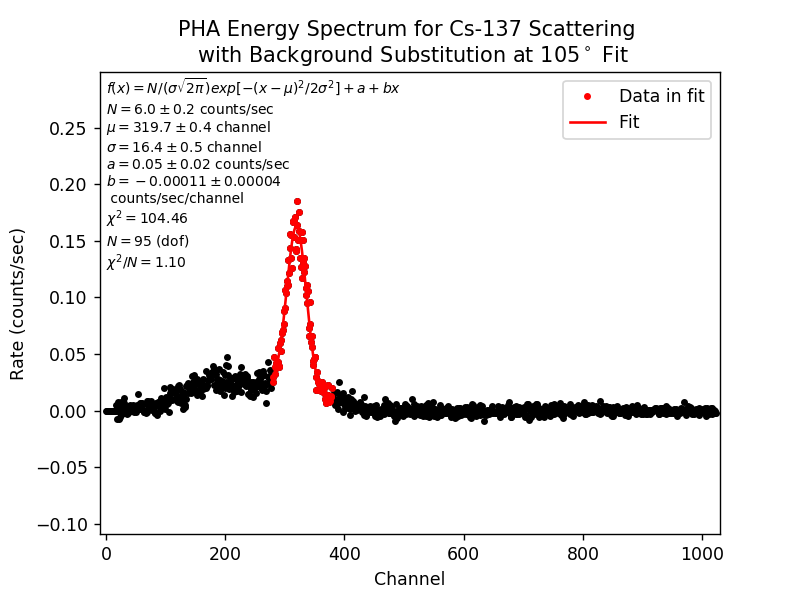

In [8]:
#Creating a fit for the background subtracted scattered spectrum

def fitfunc(p,x):
    return (p[0]/(p[2]*np.sqrt(2*np.pi)))*np.exp(-(x-p[1])**2/((p[2]**2)*2))+p[3]+p[4]*x
def residual(p, x, y, err):
    return (fitfunc(p, x)-y)/err

p0 = [50., 320., 30., 100., 0.1]

# Sets the lower and upper bounds of the region of interest

b=280
t=380

channel2 = channel[b:t]
N2 = R_bkg_sub[b:t]
dN2 = dR_bkg_sub[b:t]
pf, cov, info, mesg, success = optimize.leastsq(residual, p0, args=(channel2, N2, dN2),
                                                full_output=1)

if cov is None:
    print('Fit did not converge')
    print('Success code:', success)
    print(mesg)
else:
    chisq = sum(info['fvec']*info['fvec'])
    dof = len(channel2) - len(pf)
    pferr = [np.sqrt(cov[i,i]) for i in range(len(pf))]
    print('Converged with chi-squared', chisq)
    print('Number of degrees of freedom, dof =', dof)
    print('Reduced chi-squared ', chisq/dof)
    print('Inital guess values:')
    print('  p0 =', p0)
    print('Best fit values:')
    print('  pf =', pf)
    print('Uncertainties in the best fit values:')
    print('  pferr =', pferr)
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(channel, R_bkg_sub, 'k.')
ax.plot(channel2, N2, 'r.', label='Data in fit')

    
# We then plot the fit function. We could plot it at each point in "channel2"
#  and connect those points with straight lines. However, we may want a smoother
#  plot. To do so, we create a new array of points using "linspace()" that covers
#  the same range, but more densely. When we connect these points, the line will
#  be more smooth.
CHANNEL = np.linspace(min(channel2), max(channel2), 5000)
ax.plot(CHANNEL, fitfunc(pf, CHANNEL), 'r-', label='Fit')

ax.axis([-10,1030,min(R_bkg_sub)-.1,max(R_scatt)+.1])
ax.set_title('PHA Energy Spectrum for Cs-137 Scattering \n with Background Substitution at 105$^\\circ$ Fit')
ax.set_xlabel('Channel')
ax.set_ylabel('Rate (counts/sec)')
ax.legend()

textfit1 = '$f(x) = N/( \\sigma\\sqrt{2\\pi})exp[-(x-\\mu)^2/2\\sigma^2]+a+bx$ \n' \
               '$N = %.1f \pm %.1f$ counts/sec \n' \
               '$\\mu = %.1f \pm %.1f$ channel \n' \
               '$\\sigma = %.1f \pm %.1f$ channel \n' \
               '$a = %.2f \pm %.2f$ counts/sec \n' \
               '$b = %.5f \pm %.5f$ \n counts/sec/channel \n' \
                '$\chi^2= %.2f$ \n' \
               '$N = %i$ (dof) \n' \
               '$\chi^2/N = %.2f$' \
                % (pf[0], pferr[0], pf[1], pferr[1], pf[2], pferr[2], pf[3], pferr[3], pf[4], pferr[4], chisq, dof, chisq/dof)
ax.text(0.01, .99, textfit1, transform=ax.transAxes, fontsize=8,
             verticalalignment='top')

plt.savefig('Exp2_105_scatt_0519_bkg_sub_fit.pdf')
plt.show()